Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Shapiro-Wilk rejects H0


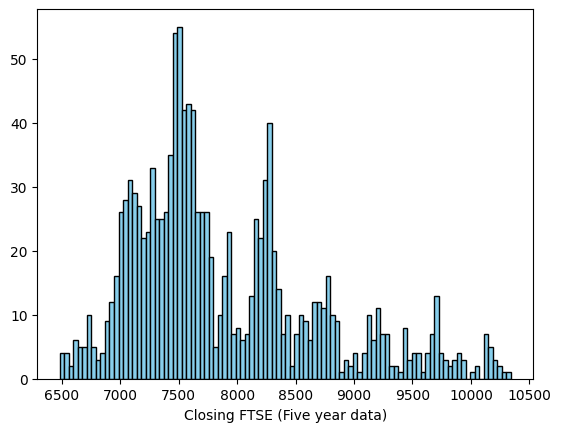

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np
from scipy import stats

ticker_FTSE = yf.Ticker("^FTSE") #FTSE
data_FTSE = ticker_FTSE.history(period="5y")

print(data_FTSE.columns) # So far no log-returns as we have not yet applied the transformation

plt.hist(data_FTSE['Close'], bins = 100, color = "skyblue", edgecolor = 'black') #Plot hist FTSE Closes
plt.xlabel('Closing FTSE (Five year data)') 

Shapiro_Close = stats.shapiro(data_FTSE['Close'])
Shapiro_Close

if Shapiro_Close.pvalue <= 0.05:
    print("Shapiro-Wilk rejects H0")
else:
    print("Shapiro-Wilk fails to reject H0")

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'log_r'],
      dtype='object')
Date
2021-02-04 00:00:00+00:00   -0.000630
2021-02-05 00:00:00+00:00   -0.002217
2021-02-08 00:00:00+00:00    0.005256
2021-02-09 00:00:00+00:00    0.001241
2021-02-10 00:00:00+00:00   -0.001103
                               ...   
2026-01-28 00:00:00+00:00   -0.005245
2026-01-29 00:00:00+00:00    0.001712
2026-01-30 00:00:00+00:00    0.005070
2026-02-02 00:00:00+00:00    0.011486
2026-02-03 00:00:00+00:00   -0.005055
Name: log_r, Length: 1261, dtype: float64
ShapiroResult(statistic=np.float64(0.9341396969092698), pvalue=np.float64(3.6704975901619245e-23))
Shapiro-Wilk rejects H0


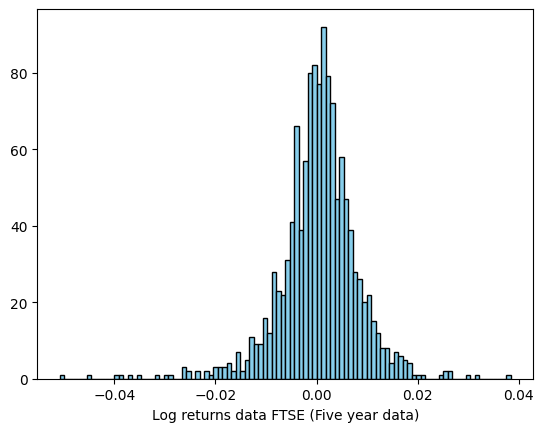

In [2]:
data_FTSE['log_r'] = np.log(data_FTSE['Close']).diff() # Apply log and differences Xfter
print(data_FTSE.columns) # Check for log returns

#print(data_FTSE['log_r'])  <- command for checking if Nan exists
data_FTSE = data_FTSE.dropna(subset=['log_r']) # remove Nan rows, happens with log returns data
print(data_FTSE['log_r']) # see if success

plt.hist(data_FTSE['log_r'], bins = 100, color = "skyblue", edgecolor = 'black') #Plot log returns
plt.xlabel('Log returns data FTSE (Five year data)')


Shapiro_log_r = stats.shapiro(data_FTSE['log_r'])
print(Shapiro_log_r)

if Shapiro_Close.pvalue <= 0.05:
    print("Shapiro-Wilk rejects H0")
else:
    print("Shapiro-Wilk fails to reject H0")

[*********************100%***********************]  5 of 5 completed


Ticker            ADM.L        AV.L        BEZ.L       HSBA.L        HSX.L
Date                                                                      
2021-02-03  2931.463379  350.640411   319.694031   387.397797   943.299316
2021-02-04  2949.405029  343.664948   320.892883   394.825592   935.108826
2021-02-05  2940.434326  335.805298   368.846954   391.336090   951.889221
2021-02-08  2907.541260  337.082489   359.655762   389.242249   950.690552
2021-02-09  2941.430908  335.707031   371.444458   393.828674   962.676636
...                 ...         ...          ...          ...          ...
2026-01-28  2694.000000  634.599976  1133.000000  1258.599976  1493.000000
2026-01-29  2734.000000  635.000000  1132.000000  1270.000000  1495.000000
2026-01-30  2750.000000  635.799988  1133.000000  1285.400024  1482.000000
2026-02-02  2784.000000  651.400024  1168.000000  1305.000000  1492.000000
2026-02-03  2750.000000  645.200012  1162.000000  1295.000000  1489.000000

[1262 rows x 5 columns]


Text(0.5, 0, 'Log returns Portfolio A (Five year data)')

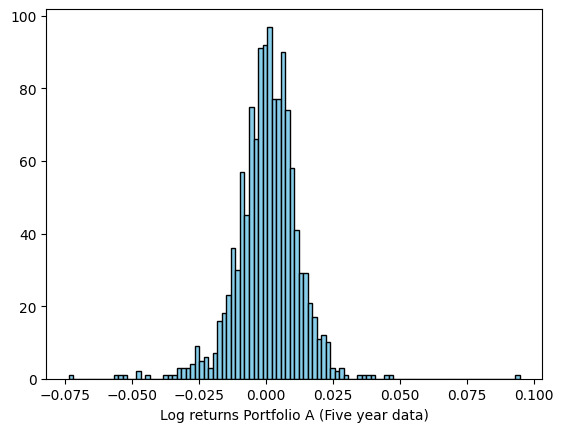

In [3]:
data_sectA = yf.download(['HSX.L', 'HSBA.L', 'BEZ.L', 'AV.L', 'ADM.L'],
                        period="5y"
                        ) # Getting stocks of interest (mostly insurance and financial sect)


data_sectA = data_sectA['Close']
print(data_sectA) #good

log_r = np.log(data_sectA / data_sectA.shift(1))
weights = np.repeat(1 / log_r.shape[1], log_r.shape[1]) # Creating portfolio returns

sector_log_r = log_r @ weights
#print(sector_log_r) # has Nan

sector_log_r = sector_log_r.dropna() #sector... is a series not dataframe
dataPTF_log_r = sector_log_r.to_frame()

plt.hist(sector_log_r, bins = 100, color = "skyblue", edgecolor = 'black') #Plot log returns
plt.xlabel('Log returns Portfolio A (Five year data)')

Index_Skewness is: -0.784241832893702
Index Kurtosis is: 5.277981581717794
PTF Skewness is: -0.784241832893702
PTF Kurtosis is: [6.65727341]


<Axes: ylabel='Density'>

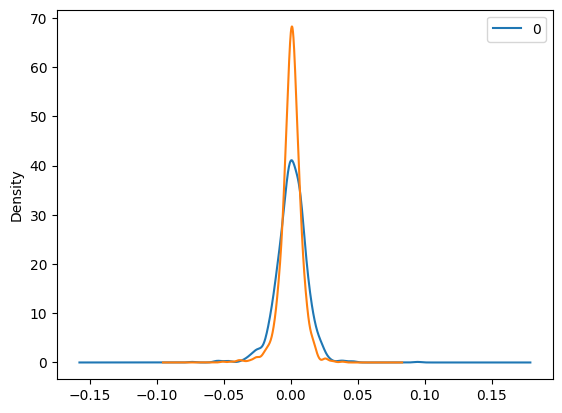

In [4]:
#skewness and kurtosis
from scipy.stats import skew
from scipy.stats import kurtosis

data_test = [88, 85, 82, 97, 67, 77, 74, 86, 81, 95, 77, 88, 85, 76, 81]
skewness_1 = skew(data_FTSE['log_r'], bias=False)
kurtosis_1 = kurtosis(data_FTSE['log_r'], bias = False)

print("Index_Skewness is:", skewness_1)
print("Index Kurtosis is:", kurtosis_1)

skewness_2 = skew(data_FTSE['log_r'], bias=False)
kurtosis_2 = kurtosis(dataPTF_log_r, bias = False)

print("PTF Skewness is:", skewness_2)
print("PTF Kurtosis is:", kurtosis_2) #correct

dataPTF_log_r.plot.density()
data_FTSE['log_r'].plot.density() #up to 70, more 

In [5]:
#Summarising results
if kurtosis_1 > 3:
    print("FTSE curve is leptokurtic, with'fat' tails at:", kurtosis_1)
elif kurtosis_1 < 3:
    print("FTSE curve is platykurtic, with 'fine' tails at:", kurtosis_1)
else:
    print("FTSE has kurtosis of exactly 3, normally distributed at:", kurtosis_1)

if kurtosis_2 > 3:
    print("PTF curve is leptokurtic, with'fat' tails at:", kurtosis_2)
elif kurtosis_2 < 3:
    print("PTF curve is platykurtic, with 'fine' tails at:", kurtosis_2)
else:
    print("PTF has kurtosis of exactly 3, normally distributed at:", kurtosis_2)

FTSE curve is leptokurtic, with'fat' tails at: 5.277981581717794
PTF curve is leptokurtic, with'fat' tails at: [6.65727341]


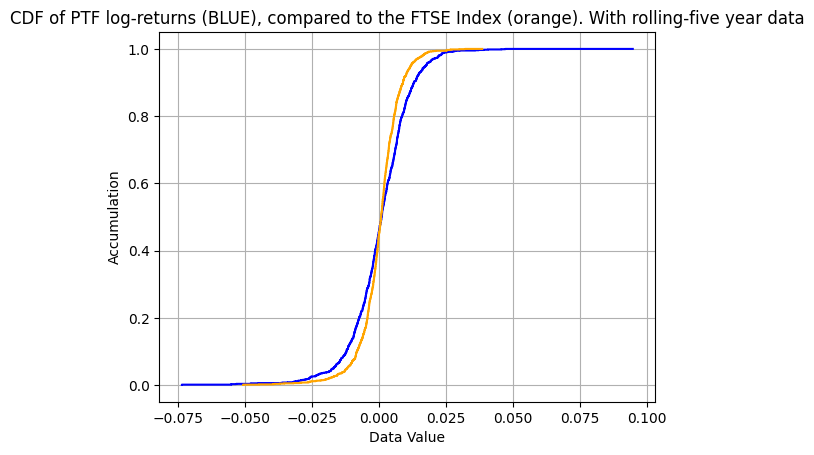

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF #Package for ECDF

#Creating cumulative distribution function


Dim1_dataPTF = (dataPTF_log_r.squeeze())
ecdf_PTF = ECDF(Dim1_dataPTF)
ecdf_FTSE = ECDF(data_FTSE['log_r']) #Creating cumulative distribution function

#Plot below
plt.step(ecdf_PTF.x, ecdf_PTF.y, color = 'blue')
plt.step(ecdf_FTSE.x, ecdf_FTSE.y, color = 'orange')
plt.xlabel('Data Value') #Figure out a better/more accurate label
plt.ylabel('Accumulation')
plt.title('CDF of PTF log-returns (BLUE), compared to the FTSE Index (orange). With rolling-five year data')
plt.grid()
plt.show()